In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder,OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_regression, RFE, chi2
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score
from sklearn.impute import SimpleImputer

In [4]:
data=pd.read_csv("adult.csv")

In [5]:
df=pd.DataFrame(data)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
data.info

<bound method DataFrame.info of        age         workclass  fnlwgt   education  education-num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      

In [7]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [8]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [10]:
df.shape

(32561, 15)

In [11]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [12]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 32561, dtype: bool

In [13]:
df.duplicated().sum()

24

In [14]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()


0

In [15]:
df.shape

(32537, 15)

In [16]:
df.duplicated().sum()


0

In [17]:
#FIND OUTLIERS(DRAW BOXPLOT,GRP THE NUMERICAL COLUMNS)

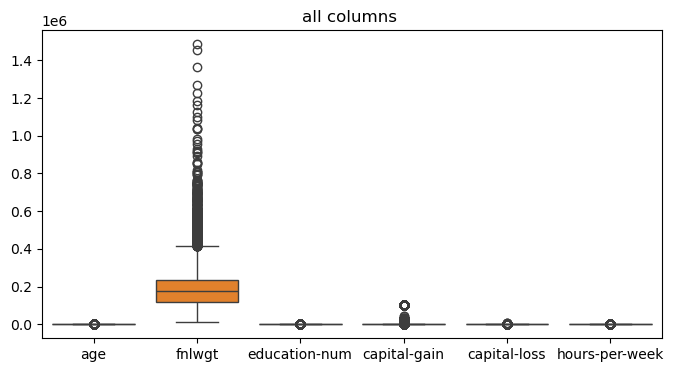

In [18]:
plt.figure(figsize=(8,4))
sns.boxplot(df)
plt.title('all columns ')
plt.show()

In [19]:
def handling_outliers(data):
    # Ensure data is a DataFrame
    if not isinstance(data, pd.DataFrame):
        raise ValueError("Input data must be a Pandas DataFrame")

    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        # Example logic to handle outliers (replace with your logic)
        df[col] = df[col].clip(lower=q1 - 1.5 * iqr, upper=q3 + 1.5 * iqr)
    return df

# Call the function
df1 = handling_outliers(data)
print(df1)


       age         workclass  fnlwgt   education  education-num  \
0       39         State-gov   77516   Bachelors           13.0   
1       50  Self-emp-not-inc   83311   Bachelors           13.0   
2       38           Private  215646     HS-grad            9.0   
3       53           Private  234721        11th            7.0   
4       28           Private  338409   Bachelors           13.0   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm           12.0   
32557   40           Private  154374     HS-grad            9.0   
32558   58           Private  151910     HS-grad            9.0   
32559   22           Private  201490     HS-grad            9.0   
32560   52      Self-emp-inc  287927     HS-grad            9.0   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      Married-civ-spouse    Exec-manag

In [20]:
df1 = handling_outliers(df)
df1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,32.5,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [21]:
df1.shape

(32537, 15)

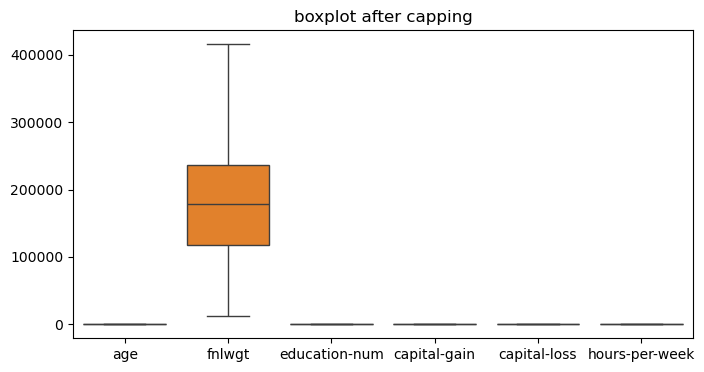

In [22]:
plt.figure(figsize=(8,4))
sns.boxplot(df1)
plt.title('boxplot after capping')
plt.show()

In [23]:
# HISTPLOT

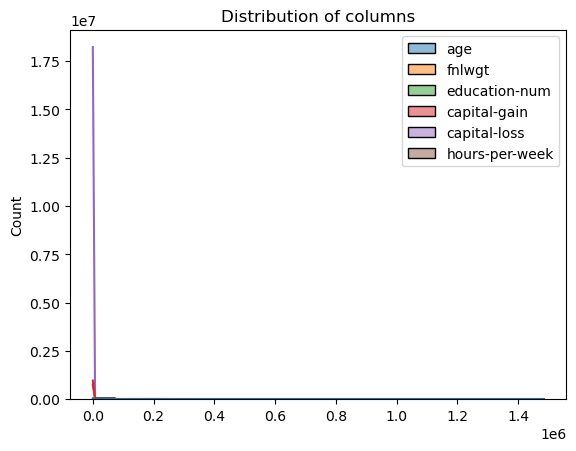

In [24]:
# Histogram for hours-per-week
sns.histplot(data=data, kde=True, bins=20)
plt.title("Distribution of columns")
plt.show()

In [25]:
#FIND SKEWNESS

In [26]:
numerical_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
from scipy.stats import skew

for col in numerical_columns:
    skewness_value = skew(data[col].dropna()) 
    
    # Drop NaN values for accurate calculation
    
    print(f'Skewness of {col}: {skewness_value:.4f}')

Skewness of age: 0.5587
Skewness of fnlwgt: 1.4469
Skewness of education-num: -0.3117
Skewness of capital-gain: 11.9533
Skewness of capital-loss: 4.5944
Skewness of hours-per-week: 0.2276


In [27]:
# CORRELATION HEATMAP

In [28]:
df_encoded=pd.get_dummies(df1,drop_first=True)
df_encoded

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,39,77516,13.0,0,0,40.0,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,50,83311,13.0,0,0,32.5,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,38,215646,9.0,0,0,40.0,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
3,53,234721,7.0,0,0,40.0,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
4,28,338409,13.0,0,0,40.0,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12.0,0,0,38.0,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
32557,40,154374,9.0,0,0,40.0,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True
32558,58,151910,9.0,0,0,40.0,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
32559,22,201490,9.0,0,0,32.5,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False


In [29]:
corr_matrix=df_encoded.corr()
corr_matrix

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
age,1.000000,-0.077169,0.047012,NaN,NaN,0.091242,0.051676,0.061139,-0.019468,-0.198822,...,0.008065,0.002631,0.000147,-0.013845,-0.006275,0.004915,0.015677,-0.015081,0.000413,0.235830
fnlwgt,-0.077169,1.000000,-0.039794,NaN,NaN,-0.025753,-0.008770,-0.001244,0.005014,0.043132,...,0.008508,-0.003610,-0.012184,-0.000900,-0.000658,0.002717,-0.077752,-0.011243,0.004731,-0.008420
education-num,0.047012,-0.039794,1.000000,NaN,NaN,0.184978,0.060361,0.100373,-0.015658,-0.120959,...,-0.038865,0.000975,0.016020,0.051053,0.007837,-0.017266,0.076595,-0.006309,-0.001411,0.342360
capital-gain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
capital-loss,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native-country_Trinadad&Tobago,0.004915,0.002717,-0.017266,NaN,NaN,-0.004392,-0.004215,-0.001152,-0.000355,0.002104,...,-0.001433,-0.000464,-0.001200,-0.000958,-0.000569,1.000000,-0.070948,-0.001098,-0.000536,-0.007668
native-country_United-States,0.015677,-0.077752,0.076595,NaN,NaN,0.017456,0.015377,0.033110,0.004998,-0.042912,...,-0.174041,-0.056378,-0.145719,-0.116296,-0.069055,-0.070948,1.000000,-0.133328,-0.065104,0.034206
native-country_Vietnam,-0.015081,-0.011243,-0.006309,NaN,NaN,-0.013929,0.000093,-0.003620,-0.000666,0.009311,...,-0.002694,-0.000873,-0.002255,-0.001800,-0.001069,-0.001098,-0.133328,1.000000,-0.001008,-0.017665
native-country_Yugoslavia,0.000413,0.004731,-0.001411,NaN,NaN,0.007337,-0.003867,-0.000165,-0.000325,0.005582,...,-0.001315,-0.000426,-0.001101,-0.000879,-0.000522,-0.000536,-0.065104,-0.001008,1.000000,0.006954


In [30]:

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_columns)

# Handle missing values in categorical columns
df[categorical_columns] = df[categorical_columns].fillna("Unknown")

# Encode categorical columns using one-hot encoding (example)
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Show a summary of the new encoded dataset
print("Shape of encoded dataset:", df_encoded.shape)
print(df_encoded.head())


Categorical columns: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
Shape of encoded dataset: (32537, 101)
   age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   39   77516           13.0             0             0            40.0   
1   50   83311           13.0             0             0            32.5   
2   38  215646            9.0             0             0            40.0   
3   53  234721            7.0             0             0            40.0   
4   28  338409           13.0             0             0            40.0   

   workclass_Federal-gov  workclass_Local-gov  workclass_Never-worked  \
0                  False                False                   False   
1                  False                False                   False   
2                  False                False                   False   
3                  False                False                   Fal

In [31]:
#Split data into features and target
X = data.drop('income', axis = 1)
y = data['income']

In [32]:
#Split data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

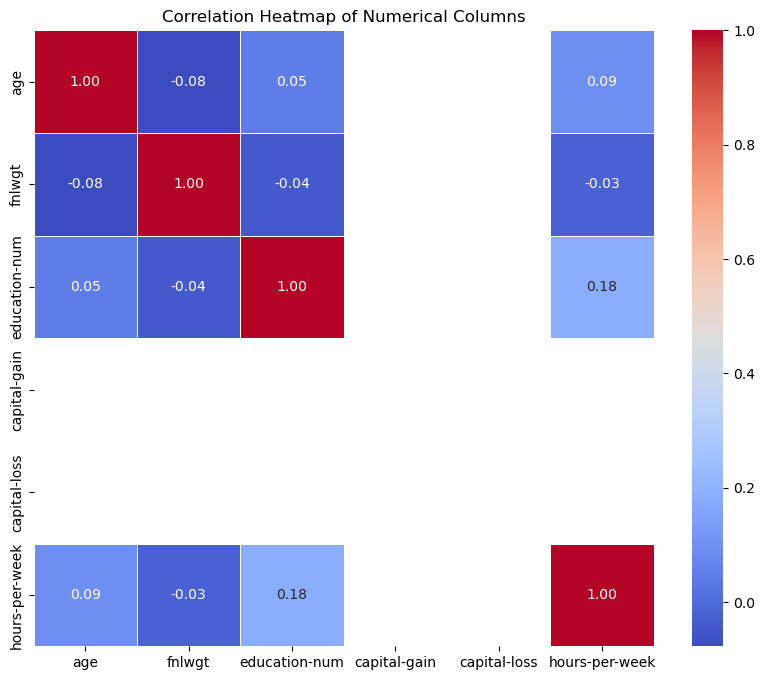

In [33]:
# Select numerical columns from the DataFrame
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Compute the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()

In [34]:
#VISUALISATION DISTRIBUTION  OF NUMERICAL FEATURES

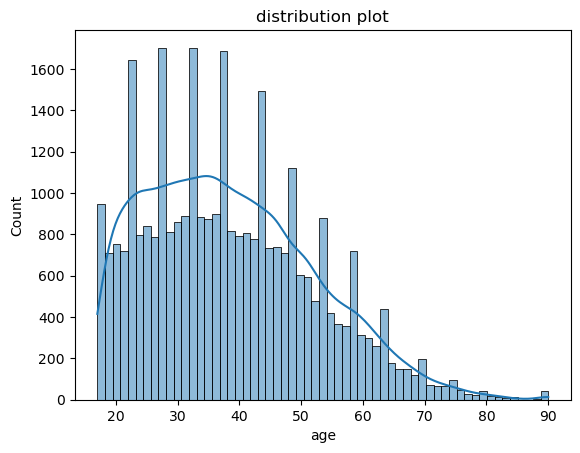

In [35]:
sns.histplot(data=data,x=data.age,kde=True)
plt.title('distribution plot')
plt.show()


In [36]:
#COUNTPLOT FOR CATEGORICAL VARIABLES

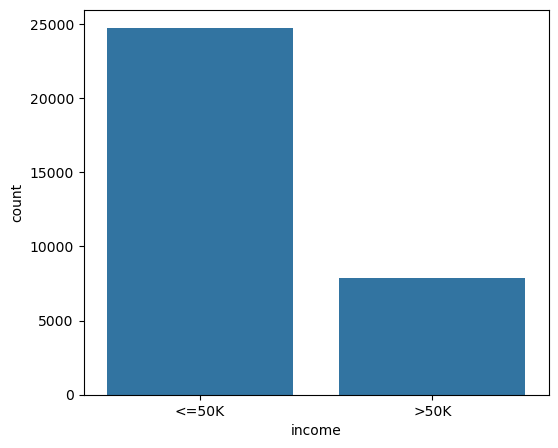

In [37]:
plt.figure(figsize=(6, 5))
sns.countplot(x='income',data=data)
plt.show()

In [38]:
#SCATTER PLOT

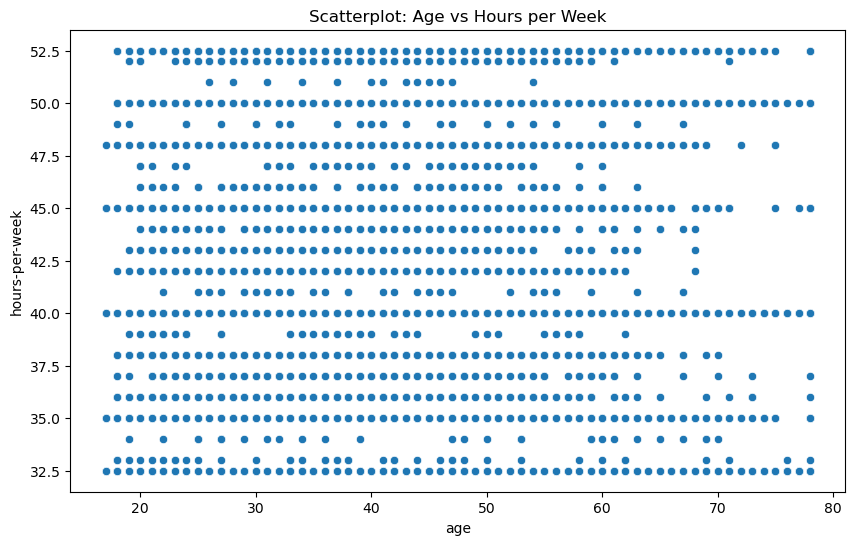

In [39]:
# Scatter plot of age vs hours-per-week


plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='hours-per-week', data=df_encoded)
plt.title("Scatterplot: Age vs Hours per Week")
plt.show()

In [40]:
import pandas as pd
from scipy.stats import kurtosis
for col in numerical_columns:
    kurtosis_value = kurtosis(data[col].dropna(), fisher=True)  
    
    # Drop NaN values for accurate calculation
    print(f'Kurtosis of {col}: {kurtosis_value:.4f}')

Kurtosis of age: -0.1663
Kurtosis of fnlwgt: 6.2177
Kurtosis of education-num: 0.6232
Kurtosis of capital-gain: 154.7755
Kurtosis of capital-loss: 20.3735
Kurtosis of hours-per-week: 2.9161


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

In [42]:
# Features and target
X = df.drop(columns=['income'])  # Features
y = df['income']

# Step 1: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [43]:
# Step 2: Feature Selection (on Training Set)

# Encode categorical features for Chi-Square

le = LabelEncoder()
categorical_features = X_train.select_dtypes(include='object').columns
for col in categorical_features:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])  # Apply same transformation to test set

In [44]:
# Select top 5 features
feature_selector = SelectKBest(chi2, k=5)
X_train_selected = feature_selector.fit_transform(X_train, y_train)
X_test_selected = feature_selector.transform(X_test)


# Get selected feature names
selected_features = X_train.columns[feature_selector.get_support()]
print("Selected Features:", selected_features)

# Step 3: Scaling (on Selected Features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Final Training and Testing Sets
print("Final Training Set Shape:", X_train_scaled.shape)
print("Final Testing Set Shape:", X_test_scaled.shape)

Selected Features: Index(['age', 'fnlwgt', 'education-num', 'relationship', 'hours-per-week'], dtype='object')
Final Training Set Shape: (26029, 5)
Final Testing Set Shape: (6508, 5)


In [45]:
 #Apply MinMax Scaling
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Check the scaled dataset
print(df.head())

        age         workclass    fnlwgt  education  education-num  \
0  0.360656         State-gov  0.161680  Bachelors       0.739130   
1  0.540984  Self-emp-not-inc  0.176044  Bachelors       0.739130   
2  0.344262           Private  0.504046    HS-grad       0.391304   
3  0.590164           Private  0.551325       11th       0.217391   
4  0.180328           Private  0.808324  Bachelors       0.739130   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0           0.0           0.0           0.375  United-States  <=50K  


In [46]:


# Train and evaluate multiple models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42)
}

results = {}


In [47]:
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)



 # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"Model: {name}")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))

Model: Random Forest
Accuracy: 0.8294406883835279
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.87      0.91      0.89      4940
        >50K       0.67      0.57      0.62      1568

    accuracy                           0.83      6508
   macro avg       0.77      0.74      0.75      6508
weighted avg       0.82      0.83      0.82      6508

Model: Gradient Boosting
Accuracy: 0.8443454210202828
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90      4940
        >50K       0.72      0.57      0.64      1568

    accuracy                           0.84      6508
   macro avg       0.80      0.75      0.77      6508
weighted avg       0.84      0.84      0.84      6508



C:\Users\ASAA\.ipython\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.7884142593730793
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.82      0.93      0.87      4940
        >50K       0.60      0.35      0.45      1568

    accuracy                           0.79      6508
   macro avg       0.71      0.64      0.66      6508
weighted avg       0.77      0.79      0.77      6508

Model: Decision Tree
Accuracy: 0.7795021511985248
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.86      0.85      0.85      4940
        >50K       0.54      0.56      0.55      1568

    accuracy                           0.78      6508
   macro avg       0.70      0.70      0.70      6508
weighted avg       0.78      0.78      0.78      6508

Model: Support Vector Machine
Accuracy: 0.7590657652120467
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.76      1.00      0.86      4940


C:\Users\ASAA\.ipython\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASAA\.ipython\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASAA\.ipython\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [66]:
results = pd.DataFrame({
    'Model': [models],
    'Accuracy': [accuracy]
})

In [67]:
results = results.sort_values(by='Accuracy', ascending=False)

print(results)

                                               Model  Accuracy
0  {'Random Forest': (DecisionTreeClassifier(max_...  0.759066


In [68]:
best_model_name = results['Model'].iloc[0]
best_accuracy = results['Accuracy'].iloc[0]

In [69]:
print(f"\nThe best model is: {best_model_name} with an accuracy of {best_accuracy}")


The best model is: {'Random Forest': RandomForestClassifier(random_state=42), 'Gradient Boosting': GradientBoostingClassifier(random_state=42), 'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42), 'Decision Tree': DecisionTreeClassifier(random_state=42), 'Support Vector Machine': SVC(random_state=42)} with an accuracy of 0.7590657652120467


In [70]:
#HYPERPARAMETER TUNNING WITH SVC
param_distributions = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

In [74]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf']  # Kernel types
}

# Create an SVC model
svc = SVC()

# Perform Grid Search with 3-fold cross-validation
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=3, verbose=1, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and cross-validation accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Parameters: {'C': 10, 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.8278076265736924


In [73]:
y_pred

array(['<=50K', '>50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [75]:
from sklearn.pipeline import Pipeline



In [76]:
pipeline = Pipeline([('scaler',StandardScaler()),('classifier',SVC())])
pipeline.fit(X_train_scaled,y_train)           #train the pipeline


Pipeline(steps=[('scaler', StandardScaler()), ('classifier', SVC())])

In [80]:
# Step 7: Initialize and train the SVC model
svc_model = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42)
svc_model.fit(X_train_scaled, y_train)


SVC(random_state=42)

In [83]:
y_pred=pipeline.predict(X_test_scaled)


In [84]:
X_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [85]:
#save the trained pipeline
import joblib
joblib.dump(pipeline,'pipeline.joblib')


['pipeline.joblib']

In [86]:

load_model = joblib.load('pipeline.joblib')

In [102]:
unseen_data=pd.read_csv('unseendata.csv')

In [103]:
dataframe2=pd.DataFrame(unseen_data)
dataframe2.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [104]:
dataframe2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             26 non-null     int64 
 1   workclass       26 non-null     object
 2   fnlwgt          26 non-null     int64 
 3   education       26 non-null     object
 4   education-num   26 non-null     int64 
 5   marital-status  26 non-null     object
 6   occupation      26 non-null     object
 7   relationship    26 non-null     object
 8   race            26 non-null     object
 9   sex             26 non-null     object
 10  capital-gain    26 non-null     int64 
 11  capital-loss    26 non-null     int64 
 12  hours-per-week  26 non-null     int64 
 13  native-country  26 non-null     object
 14  income          26 non-null     object
dtypes: int64(6), object(9)
memory usage: 3.2+ KB


In [105]:
# Drop columns where all values are NaN
unseen_data = unseen_data.dropna(axis=1, how='all')

# Drop rows where all values are NaN
unseen_data = unseen_data.dropna(how='all')


print(unseen_data.shape)
unseen_data.head(1)


(26, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


In [115]:
# Apply OneHotEncoder (using pd.get_dummies) to the unseen data
unseen_data_encoded = pd.get_dummies(unseen_data, columns=categorical_columns, drop_first=True)

# Align the unseen data with the training data (fill missing columns with 0)
unseen_data_encoded = unseen_data_encoded.reindex(columns=df.columns, fill_value=0)
unseen_data_encoded


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0,0
1,50,0,83311,0,13,0,0,0,0,0,0,0,13,0,0
2,38,0,215646,0,9,0,0,0,0,0,0,0,40,0,0
3,53,0,234721,0,7,0,0,0,0,0,0,0,40,0,0
4,28,0,338409,0,13,0,0,0,0,0,0,0,40,0,0
5,37,0,284582,0,14,0,0,0,0,0,0,0,40,0,0
6,49,0,160187,0,5,0,0,0,0,0,0,0,16,0,0
7,52,0,209642,0,9,0,0,0,0,0,0,0,45,0,0
8,31,0,45781,0,14,0,0,0,0,0,14084,0,50,0,0
9,42,0,159449,0,13,0,0,0,0,0,5178,0,40,0,0


In [110]:
unseen_data_encoded = unseen_data_encoded.fillna(0)
unseen_data_encoded

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,0,0,Not-in-family,0,0,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,0,0,Husband,0,0,0,0,13,United-States
2,38,Private,215646,HS-grad,9,0,0,Not-in-family,0,0,0,0,40,United-States
3,53,Private,234721,11th,7,0,0,Husband,0,0,0,0,40,United-States
4,28,Private,338409,Bachelors,13,0,0,Wife,0,0,0,0,40,Cuba
5,37,Private,284582,Masters,14,0,0,Wife,0,0,0,0,40,United-States
6,49,Private,160187,9th,5,0,0,Not-in-family,0,0,0,0,16,Jamaica
7,52,Self-emp-not-inc,209642,HS-grad,9,0,0,Husband,0,0,0,0,45,United-States
8,31,Private,45781,Masters,14,0,0,Not-in-family,0,0,14084,0,50,United-States
9,42,Private,159449,Bachelors,13,0,0,Husband,0,0,5178,0,40,United-States


In [119]:
unseen_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [111]:
unseen_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [130]:
unseen_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
